# Inaugural Project #



By Mathilde Maix & Nina Frandsen Jensen

Imports:

In [18]:
#Import 
from types import SimpleNamespace

import numpy as np
from scipy import optimize

import pandas as pd 
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

from inauguralproject import HouseholdSpecializationModelClass
model = HouseholdSpecializationModelClass()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1 #

We demonstrate the variability of the following expression as alpha and sigma values change, assuming a discrete choice set for the model in half-hour intervals.
$$
H_F/H_M
$$
The expression represents the correlation between female and male involvement in home production

In [19]:
resultsx = {}

# Defining lists alpha and sigma 
alpha_list = [0.25, 0.5, 0.75]
sigma_list = [0.5, 1.0, 1.5]

# Using the defined lists of values for sigma and alpha to solve the model 
for alpha in alpha_list:    
    for sigma in sigma_list:
        # Assigning values to alpha and sigma
        model.par.alpha = alpha
        model.par.sigma = sigma

        # Solving the model
        opt = model.solve_discrete()
        resultsx[(alpha, sigma)] = opt.HF / opt.HM
        
        # Print 
        print(f"alpha = {alpha:.2f}, sigma = {sigma:.2f} -> HF/HM = {opt.HF:.2f}/{opt.HM:.2f} = {opt.HF/opt.HM:.2f}")
    

alpha = 0.25, sigma = 0.50 -> HF/HM = 3.00/5.50 = 0.55
alpha = 0.25, sigma = 1.00 -> HF/HM = 2.00/6.50 = 0.31
alpha = 0.25, sigma = 1.50 -> HF/HM = 1.50/7.00 = 0.21
alpha = 0.50, sigma = 0.50 -> HF/HM = 4.50/4.50 = 1.00
alpha = 0.50, sigma = 1.00 -> HF/HM = 4.50/4.50 = 1.00
alpha = 0.50, sigma = 1.50 -> HF/HM = 4.50/4.50 = 1.00
alpha = 0.75, sigma = 0.50 -> HF/HM = 5.50/3.00 = 1.83
alpha = 0.75, sigma = 1.00 -> HF/HM = 6.50/2.00 = 3.25
alpha = 0.75, sigma = 1.50 -> HF/HM = 7.00/1.50 = 4.67


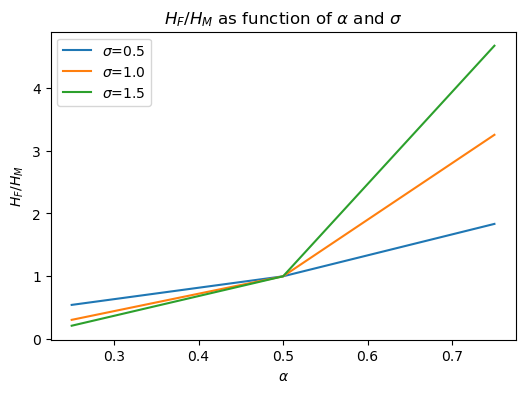

In [20]:

# Plotting optimal HF/HM against alpha for each sigma using a loop
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)

# Loop over sigma-values
for sigma in sigma_list:
    y = [resultsx[(alpha, sigma)] for alpha in alpha_list]
    ax.plot(alpha_list, y, label=f'$\sigma$={sigma}')

ax.set_xlabel('$\\alpha$')
ax.set_ylabel('$H_F/H_M$')
ax.set_title('$H_F/H_M$ as function of $\\alpha$ and $\\sigma$')
ax.legend(prop={'size': 10})
plt.show()


$\alpha$ represents the relative productivity of females compared to males in the household, while $\sigma$ represents the elasticity of substitution. From this analysis, we conclude:
* $\alpha=0.5$: Males and females are equally productive, and the $\sigma$ value has no impact. This is because there is no benefit or advantage in substituting between home production tasks performed by males or females. 

* $\alpha>0.5$: Females are more productive than males, and for wF = wM = 1, the female will work do more household work compared to the male.

* $\alpha<0.5$: Females are less productive than males, and for wF = wM = 1, the female will work do less household work compared to the male.

When $\sigma$ is higher, it becomes easier to interchange the hours worked by the male and female at home. If $\alpha$ is above 0.5, a higher $\sigma$ leads to a larger ratio of female-to-male hours. If $\alpha$ is below 0.5, the ratio is smaller. This happens because a higher $\sigma$ allows the couple to assign more household work hours to the more productive member.

# Question 2 #

We create a plot comparing logarithmic functions against each other while using different values for the female wage.

The wages for females are [0.8 0.9 1.  1.1 1.2]


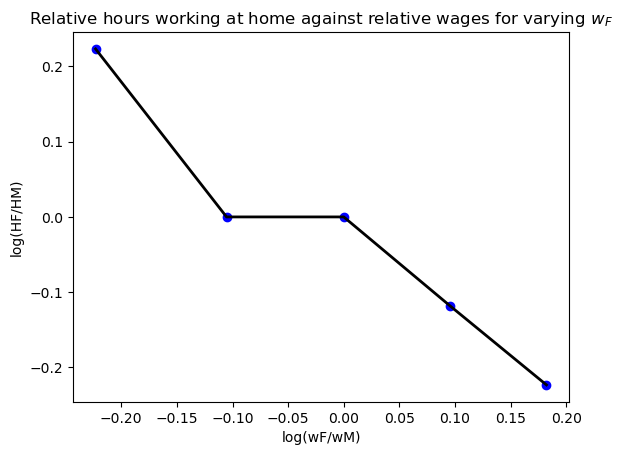

In [21]:
# 1. Create an instance of the HouseholdSpecializationModelClass
model = HouseholdSpecializationModelClass()

# 2. Define the vector of wage rates
wf = model.par.wF_vec
print(f"The wages for females are {wf}")
           
# 3. Create an empty array to store the optimal labor supply
temp_ratio= np.zeros_like(wf)

# 4. Loop over the wage rates and find the optimal labor supply
for i, wage in enumerate(wf):
    model.par.wF = wage
    opt = model.solve_discrete()
    ratio = opt.HF/opt.HM
    temp_ratio[i]=ratio
   
# 5. Plot the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.log(wf), np.log(temp_ratio), color='black', lw=2) # the famale wage is equal to the relative becuase wM = 1
plt.xlabel("log(wF/wM)")
plt.ylabel("log(HF/HM)")
plt.title("Relative hours working at home against relative wages for varying $w_F$")

# 6. Add data points
x_data = np.log(np.linspace(0.8, 1.2, 5))
y_data = np.log(temp_ratio[:5])
plt.scatter(x_data, y_data, color='blue')

# 7. Show the graph
plt.show()

# Question 3 #

In [22]:
model3 = HouseholdSpecializationModelClass()

log_Hratio = []
log_wratio =[]

for wF in model3.par.wF_vec:
    model3.par.wF = wF
    optimum = model3.solve()
    log_HFM = np.log(optimum.HF/optimum.HM)
    log_Hratio = np.append(log_Hratio, log_HFM)
    log_wF = np.log(wF/model3.par.wM)
    log_wratio = np.append(log_wratio, log_wF)
    print(wF, log_HFM, log_wF)

0.8 0.2231532730184448 -0.2231435513142097
0.9 0.10536826764744818 -0.10536051565782628
1.0 5.896917626330302e-06 0.0
1.1 -0.09530861978103608 0.09531017980432493
1.2 -0.18230738741155433 0.1823215567939546


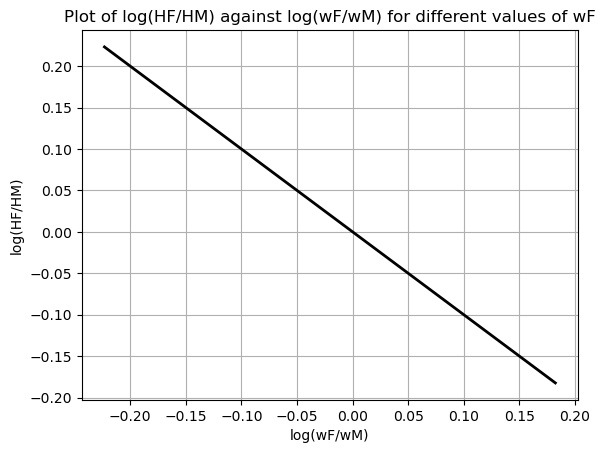

In [23]:
# creating figure
fig = plt.figure()
# creating plot
ax = fig.add_subplot(1, 1, 1)
ax.plot(log_wratio, log_Hratio, color='black', lw=2)
# making alterations to the figure
ax.grid()
ax.set_xlabel("log(wF/wM)")
ax.set_ylabel("log(HF/HM)")
ax.set_title("Plot of log(HF/HM) against log(wF/wM) for different values of wF")
plt.show()

# Question 4 #

(alpha, sigma) = (0.9820286655282875, 0.09997820455973572)


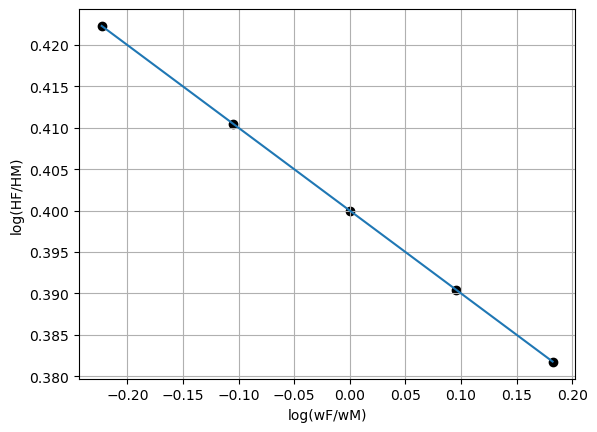

In [24]:
m4 = HouseholdSpecializationModelClass()
m4.estimate()
print(f'(alpha, sigma) = {m4.estimate()}')

# including minimizing alpha and sigma
log_Hratio = []
log_wratio =[]

for wF in m4.par.wF_vec:
    m4.par.wF = wF
    optimum = m4.solve()
    log_HFM = np.log(optimum.HF/optimum.HM)
    log_Hratio = np.append(log_Hratio, log_HFM)
    log_wF = np.log(wF/m4.par.wM)
    log_wratio = np.append(log_wratio, log_wF)


# Siminski and Yetsenga's regression line
def f(log_wratio):
    return 0.4 +(-0.1)*log_wratio


# creating the figure
fig = plt.figure()
# creating the plot
ax = fig.add_subplot(1, 1, 1)
ax.plot(log_wratio, f(log_wratio))
ax.scatter(log_wratio, log_Hratio, color='black')

# making alterations to the figure
ax.grid()
ax.set_xlabel("log(wF/wM)")
ax.set_ylabel("log(HF/HM)")
ax.set_title("")
plt.show()